# Assignment 2: Milestone I Natural Language Processing
## Task 2&3
#### Student Name: Chander Mohan
#### Student ID: 3905185

Date: 2-oct-2022

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy



## Importing libraries 

In [1]:
# importing  libraries 
import pandas as pd 
import numpy as np
import nltk
import os
from itertools import chain
import ast
from gensim import utils



## Task 2. Generating Feature Representations for Job Advertisement Descriptions

In [2]:
df = pd.read_csv("cleaned.csv") #Importing the csv file that we have created in task 1
df.head()      

,Unnamed: 0,Title,Webindex,Company,Description,body_text_tokenized,clean,body_text_nostop,no_most_fw,cleaned,categary
0,0,Finance / Accounts Asst Bromley to ****k,68997528,First Recruitment Services,Accountant (partqualified) to **** p.a. South...,"['accountant', 'partqualified', 'to', 'p', 'a'...","['accountant', 'partqualified', 'to', 'south',...","['accountant', 'partqualified', 'south', 'east...","['accountant', 'partqualified', 'south', 'east...","['accountant', 'partqualified', 'south', 'east...",Accounting_Finance
1,1,Fund Accountant Hedge Fund,68063513,Austin Andrew Ltd,One of the leading Hedge Funds in London is c...,"['one', 'of', 'the', 'leading', 'hedge', 'fund...","['one', 'of', 'the', 'leading', 'hedge', 'fund...","['leading', 'hedge', 'funds', 'london', 'recru...","['hedge', 'funds', 'london', 'recruiting', 'fu...","['hedge', 'funds', 'london', 'recruiting', 'fu...",Accounting_Finance
2,2,Deputy Home Manager,68700336,Caritas,An exciting opportunity has arisen to join an...,"['an', 'exciting', 'opportunity', 'has', 'aris...","['an', 'exciting', 'opportunity', 'has', 'aris...","['exciting', 'opportunity', 'arisen', 'join', ...","['exciting', 'arisen', 'establish', 'provider'...","['exciting', 'arisen', 'establish', 'provider'...",Healthcare_Nursing
3,3,Brokers Wanted Imediate Start,67996688,OneTwoTrade,OneTwoTrade is expanding their Sales Team and...,"['onetwotrade', 'is', 'expanding', 'their', 's...","['onetwotrade', 'is', 'expanding', 'their', 's...","['onetwotrade', 'expanding', 'sales', 'team', ...","['onetwotrade', 'expanding', 'recruiting', 'ju...","['expanding', 'recruiting', 'junior', 'trainee...",Accounting_Finance
4,4,RGN Nurses (Hospitals) Penarth,71803987,Swiis Healthcare,RGN Nurses (Hospitals) Immediate fulltime and...,"['rgn', 'nurses', 'hospitals', 'immediate', 'f...","['rgn', 'nurses', 'hospitals', 'immediate', 'f...","['rgn', 'nurses', 'hospitals', 'fulltime', 'pa...","['rgn', 'nurses', 'hospitals', 'fulltime', 'pa...","['rgn', 'nurses', 'hospitals', 'fulltime', 'pa...",Healthcare_Nursing


# Generating tokens list of lists, vocab list from dataframe

In [3]:
cleaned = df['cleaned'].apply(ast.literal_eval)     #Creating list of list of tokens 
tokenize_list = list(cleaned)
tokenize_list


[['accountant',
  'partqualified',
  'south',
  'east',
  'london',
  'manufacturing',
  'requirement',
  'accountant',
  'permanent',
  'modern',
  'offices',
  'south',
  'east',
  'london',
  'credit',
  'control',
  'purchase',
  'ledger',
  'daily',
  'collection',
  'debts',
  'phone',
  'letter',
  'email',
  'handling',
  'ledger',
  'accounts',
  'handling',
  'accounts',
  'negotiating',
  'payment',
  'terms',
  'cash',
  'reconciliation',
  'accounts',
  'adhoc',
  'administration',
  'duties',
  'person',
  'ideal',
  'previous',
  'credit',
  'control',
  'capacity',
  'possess',
  'exceptional',
  'communication',
  'part',
  'fully',
  'qualified',
  'accountant',
  'considered'],
 ['hedge',
  'funds',
  'london',
  'recruiting',
  'fund',
  'accountant',
  'paying',
  'outstanding',
  'benefits',
  'west',
  'end',
  'report',
  'head',
  'fund',
  'accounting',
  'number',
  'fund',
  'accountants',
  'senior',
  'fund',
  'accountants',
  'responsible',
  'fund',
  '

In [4]:
token = list(chain.from_iterable(cleaned))
tokens = set(token)   # geting unique element using set method 
vocab = sorted(tokens)     # vocab of tokens 
vocab

['aap',
 'aaron',
 'aat',
 'abb',
 'abenefit',
 'aberdeen',
 'abi',
 'abilities',
 'abreast',
 'abroad',
 'absence',
 'absolute',
 'ac',
 'aca',
 'academic',
 'academy',
 'acca',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'access',
 'accessible',
 'accident',
 'accommodates',
 'accommodation',
 'accomplished',
 'accordance',
 'account',
 'accountabilities',
 'accountability',
 'accountable',
 'accountancy',
 'accountant',
 'accountants',
 'accounting',
 'accounts',
 'accreditation',
 'accredited',
 'accruals',
 'accuracy',
 'accurate',
 'accurately',
 'achievable',
 'achieve',
 'achieved',
 'achievement',
 'achievements',
 'achiever',
 'achieving',
 'acii',
 'acquired',
 'acquisition',
 'acquisitions',
 'act',
 'acting',
 'action',
 'actions',
 'actionscript',
 'active',
 'actively',
 'activites',
 'activities',
 'activity',
 'acts',
 'actual',
 'actuarial',
 'acumen',
 'acute',
 'ad',
 'adam',
 'adapt',
 'adaptability',
 'add',
 'added',
 'addiction',
 'adding',
 'addition

# Creating a txt file of tokens 

In [5]:
token_file = open("./tokens.txt", 'w') # creates a txt file of discription's tokens 
for article in tokenize_list:
    token_file.write(' '.join(article) + '\n') 
    #creating the list in the txt document with space by every discription 
token_file.close() # close the file

Open the token.txt file and upload in the dataframe by using split

In [6]:
txt_file_N = 'tokens.txt'      
with open(txt_file_N) as file:
    discription_txts = file.read().splitlines() # reading the list for eech discription
tokenized_discription = [a.split(' ') for a in discription_txts] 
df['tk_text'] = tokenized_discription
df.head()

,Unnamed: 0,Title,Webindex,Company,Description,body_text_tokenized,clean,body_text_nostop,no_most_fw,cleaned,categary,tk_text
0,0,Finance / Accounts Asst Bromley to ****k,68997528,First Recruitment Services,Accountant (partqualified) to **** p.a. South...,"['accountant', 'partqualified', 'to', 'p', 'a'...","['accountant', 'partqualified', 'to', 'south',...","['accountant', 'partqualified', 'south', 'east...","['accountant', 'partqualified', 'south', 'east...","['accountant', 'partqualified', 'south', 'east...",Accounting_Finance,"[accountant, partqualified, south, east, londo..."
1,1,Fund Accountant Hedge Fund,68063513,Austin Andrew Ltd,One of the leading Hedge Funds in London is c...,"['one', 'of', 'the', 'leading', 'hedge', 'fund...","['one', 'of', 'the', 'leading', 'hedge', 'fund...","['leading', 'hedge', 'funds', 'london', 'recru...","['hedge', 'funds', 'london', 'recruiting', 'fu...","['hedge', 'funds', 'london', 'recruiting', 'fu...",Accounting_Finance,"[hedge, funds, london, recruiting, fund, accou..."
2,2,Deputy Home Manager,68700336,Caritas,An exciting opportunity has arisen to join an...,"['an', 'exciting', 'opportunity', 'has', 'aris...","['an', 'exciting', 'opportunity', 'has', 'aris...","['exciting', 'opportunity', 'arisen', 'join', ...","['exciting', 'arisen', 'establish', 'provider'...","['exciting', 'arisen', 'establish', 'provider'...",Healthcare_Nursing,"[exciting, arisen, establish, provider, elderl..."
3,3,Brokers Wanted Imediate Start,67996688,OneTwoTrade,OneTwoTrade is expanding their Sales Team and...,"['onetwotrade', 'is', 'expanding', 'their', 's...","['onetwotrade', 'is', 'expanding', 'their', 's...","['onetwotrade', 'expanding', 'sales', 'team', ...","['onetwotrade', 'expanding', 'recruiting', 'ju...","['expanding', 'recruiting', 'junior', 'trainee...",Accounting_Finance,"[expanding, recruiting, junior, trainee, broke..."
4,4,RGN Nurses (Hospitals) Penarth,71803987,Swiis Healthcare,RGN Nurses (Hospitals) Immediate fulltime and...,"['rgn', 'nurses', 'hospitals', 'immediate', 'f...","['rgn', 'nurses', 'hospitals', 'immediate', 'f...","['rgn', 'nurses', 'hospitals', 'fulltime', 'pa...","['rgn', 'nurses', 'hospitals', 'fulltime', 'pa...","['rgn', 'nurses', 'hospitals', 'fulltime', 'pa...",Healthcare_Nursing,"[rgn, nurses, hospitals, fulltime, part, swiis..."


# Generating index and dicionary of vocab 

In [7]:
i = ":"     
my_new_list = [x + i for x in vocab]  #Creating a new list of vocab and their list 
for i, j in enumerate (my_new_list, 0):
                print (j+str(i))       #generating vocab index 
                my_new_list[i] = j+str(i)

aap:0
aaron:1
aat:2
abb:3
abenefit:4
aberdeen:5
abi:6
abilities:7
abreast:8
abroad:9
absence:10
absolute:11
ac:12
aca:13
academic:14
academy:15
acca:16
accept:17
acceptable:18
acceptance:19
accepted:20
access:21
accessible:22
accident:23
accommodates:24
accommodation:25
accomplished:26
accordance:27
account:28
accountabilities:29
accountability:30
accountable:31
accountancy:32
accountant:33
accountants:34
accounting:35
accounts:36
accreditation:37
accredited:38
accruals:39
accuracy:40
accurate:41
accurately:42
achievable:43
achieve:44
achieved:45
achievement:46
achievements:47
achiever:48
achieving:49
acii:50
acquired:51
acquisition:52
acquisitions:53
act:54
acting:55
action:56
actions:57
actionscript:58
active:59
actively:60
activites:61
activities:62
activity:63
acts:64
actual:65
actuarial:66
acumen:67
acute:68
ad:69
adam:70
adapt:71
adaptability:72
add:73
added:74
addiction:75
adding:76
addition:77
additional:78
additionally:79
additions:80
address:81
addresses:82
addressing:83
adec

In [8]:
vocab_with_index = (my_new_list)

In [9]:
dic_of_vocab = {}
for b in vocab_with_index:     # creating vocab as a dictionary in which every vocab has index value 
    i = b.split(':')
   # d[i[0]] = i[1]
    dic_of_vocab[i[0]] = int(i[1])
dic_of_vocab

{'aap': 0,
 'aaron': 1,
 'aat': 2,
 'abb': 3,
 'abenefit': 4,
 'aberdeen': 5,
 'abi': 6,
 'abilities': 7,
 'abreast': 8,
 'abroad': 9,
 'absence': 10,
 'absolute': 11,
 'ac': 12,
 'aca': 13,
 'academic': 14,
 'academy': 15,
 'acca': 16,
 'accept': 17,
 'acceptable': 18,
 'acceptance': 19,
 'accepted': 20,
 'access': 21,
 'accessible': 22,
 'accident': 23,
 'accommodates': 24,
 'accommodation': 25,
 'accomplished': 26,
 'accordance': 27,
 'account': 28,
 'accountabilities': 29,
 'accountability': 30,
 'accountable': 31,
 'accountancy': 32,
 'accountant': 33,
 'accountants': 34,
 'accounting': 35,
 'accounts': 36,
 'accreditation': 37,
 'accredited': 38,
 'accruals': 39,
 'accuracy': 40,
 'accurate': 41,
 'accurately': 42,
 'achievable': 43,
 'achieve': 44,
 'achieved': 45,
 'achievement': 46,
 'achievements': 47,
 'achiever': 48,
 'achieving': 49,
 'acii': 50,
 'acquired': 51,
 'acquisition': 52,
 'acquisitions': 53,
 'act': 54,
 'acting': 55,
 'action': 56,
 'actions': 57,
 'actionscri

# Creating Count vector 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
countVectorizers = CountVectorizer(analyzer = "word",vocabulary = vocab)
countVectorizers      # creating count vactor on the basis of vocab 

CountVectorizer(vocabulary=['aap', 'aaron', 'aat', 'abb', 'abenefit',
                            'aberdeen', 'abi', 'abilities', 'abreast', 'abroad',
                            'absence', 'absolute', 'ac', 'aca', 'academic',
                            'academy', 'acca', 'accept', 'acceptable',
                            'acceptance', 'accepted', 'access', 'accessible',
                            'accident', 'accommodates', 'accommodation',
                            'accomplished', 'accordance', 'account',
                            'accountabilities', ...])

In [12]:
count_features = countVectorizers.fit_transform([' '.join(discription) for discription in tokenize_list]) 
#  generate the count vector representation for all discription 
print(count_features.shape)  
count_features

(776, 5169)


<776x5169 sparse matrix of type '<class 'numpy.int64'>'
	with 62716 stored elements in Compressed Sparse Row format>

## count vectors in the form of given format

In [13]:
webindex = df['Webindex'].astype(str)
count_vector = "#"+webindex
for j in range(0, len (count_vector)-1):
    for key, value in zip(vocab, count_features.toarray()[j]):
        if value > 0:
            count_vector[j] = count_vector[j] +", "+ str(str(dic_of_vocab[key])+":"+str(value))

In [14]:
count_vector.head(3)          # In the format that we requare to submit 

0    #68997528, 33:3, 36:3, 93:1, 102:1, 667:1, 707...
1    #68063513, 33:2, 34:2, 35:3, 322:1, 482:1, 707...
2    #68700336, 10:2, 295:1, 343:2, 1198:2, 1253:1,...
Name: Webindex, dtype: object

# Train our own model on the basis of discription tokens

In [15]:
from gensim import utils

In [16]:
class MyModel:
    def __init__(self, ModelFile):
        MyModel.fPath = ModelFile # giving the path of the token file that are in the form of text
    def __iter__(self):
        for line in open(self.fPath):   #tokens separated by whitespace
            #each discription by one line 
            yield utils.simple_preprocess(line)


In [17]:
import gensim.models

sentences_for_every_discription = MyModel('./tokens.txt')     # using the function of my model importing the txt file 
discription_w2v = gensim.models.Word2Vec(sentences=sentences_for_every_discription,vector_size=100) 

In [18]:
print(discription_w2v)

Word2Vec<vocab=2734, vector_size=100, alpha=0.025>


In [19]:
discription_w2v_wv = discription_w2v.wv

In [20]:
len(discription_w2v_wv)   # length of w2v model 

2734

In [21]:
discription_w2v_wv['aaron']   

array([-0.02640514,  0.02648362,  0.00308969, -0.01665815, -0.00361389,
       -0.07497218,  0.03571136,  0.08949644, -0.00796474, -0.02551462,
       -0.02423227, -0.06196738, -0.02546787, -0.00262733,  0.02874985,
       -0.00986957, -0.00695043, -0.0620616 ,  0.01227723, -0.06614929,
       -0.00035879,  0.01989163,  0.00246515, -0.01145201, -0.02104962,
        0.01132631, -0.01909633, -0.0335002 , -0.04651004, -0.00289884,
        0.04717376,  0.02864053,  0.02560461, -0.04349887, -0.02717507,
        0.04303131,  0.00132239, -0.05553289, -0.04889062, -0.08986192,
       -0.00365925, -0.05734881,  0.00024039,  0.01206472,  0.06387652,
       -0.03154753, -0.02209853, -0.01341371,  0.01297881,  0.05083204,
        0.01210323, -0.03871434,  0.00410218, -0.00896503, -0.02477633,
        0.01633569,  0.02880381,  0.00453669, -0.02219055, -0.00909061,
        0.0090383 ,  0.04110696, -0.01052684, -0.0115989 , -0.06520387,
        0.0297569 ,  0.00913231,  0.05313812, -0.06256604,  0.03

In [22]:
for index, word in enumerate(discription_w2v_wv.index_to_key):
    if index == 10:
        break
    print(f"word :{index}/{len(discription_w2v_wv.index_to_key)} is {word}")

word :0/2734 is time
word :1/2734 is cv
word :2/2734 is quality
word :3/2734 is www
word :4/2734 is key
word :5/2734 is requirements
word :6/2734 is benefits
word :7/2734 is opportunities
word :8/2734 is project
word :9/2734 is environment


In [23]:
discription_w2v_wv.most_similar(positive=['kind','aaron'], negative=['access'])     # tesing with element on our model 

[('copy', 0.97896808385849),
 ('discuss', 0.9769830107688904),
 ('click', 0.9753319621086121),
 ('information', 0.9749553203582764),
 ('today', 0.9749041199684143),
 ('online', 0.9742827415466309),
 ('quoting', 0.9740015864372253),
 ('vacancies', 0.9734717011451721),
 ('page', 0.973303496837616),
 ('facebook', 0.973166823387146)]

# Saving our model  

In [24]:
discription_w2v_wv.save("discription_w2v.model")    

# Using our Word2vec model 

In [25]:
import logging
from pprint import pprint as print   #importing libraries that we needed 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [26]:
from gensim.models import Word2Vec

In [27]:
def gen_vectors(wv,tk_txts):     # generate vector for documents
    vector_of_doc = pd.DataFrame() # creating empty dataframe  
   
    for i in range(0,len(tk_txts)):
        tokens = tk_txts[i]
        temp = pd.DataFrame()  #creating a fake dataframe
        for w_ind in range(0, len(tokens)): # spliting through space by using loop for each discription 
            try:
                word = tokens[w_ind]
                vec_word = wv[word]
                temp = temp.append(pd.Series(vec_word), ignore_index = True) # if word is their it will append in fake dataframe
            except:
                pass
        vector_doc = temp.sum() # the sum of each column
        vector_of_doc = vector_of_doc.append(vector_doc, ignore_index = True) 
    return vector_of_doc

In [28]:
discriptionW2v_dvs = gen_vectors(discription_w2v_wv,df['tk_text']) # generate embeddings of discription 
pd.isnull(discriptionW2v_dvs).isna().any().sum()

0

In [29]:
discriptionW2v_dvs

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-8.499357,3.590137,4.774286,-0.584273,1.672774,-23.052706,9.063643,29.723352,-9.928095,-0.644722,...,19.980057,9.231147,1.478838,9.354486,26.971891,14.113353,10.263175,-17.080952,5.423231,-8.992105
1,-6.328087,2.596487,3.737811,-0.345101,1.095096,-17.802233,7.088445,22.684870,-7.779317,-0.470229,...,15.654173,7.226674,1.308609,7.415292,20.857908,10.658751,7.994962,-13.265014,4.113707,-7.125161
2,-12.243685,7.397425,3.678483,-1.934733,1.438103,-31.525858,13.182854,41.732796,-10.846196,-5.384012,...,20.928120,11.425640,2.798878,9.757113,37.636333,20.323137,16.357546,-23.038876,11.180169,-13.221432
3,-5.137152,2.449207,2.570146,-0.617419,0.852829,-14.094222,5.906100,18.324236,-5.617275,-1.121485,...,11.486485,5.575245,1.030322,5.449807,16.631380,8.738576,6.768919,-10.412290,3.633556,-5.567770
4,-13.504615,6.325027,5.197371,-4.332357,2.968156,-39.783764,14.560515,54.547047,-12.584217,-6.014400,...,30.629148,14.586517,4.954615,16.127781,46.997654,26.634249,19.431475,-29.993599,10.455221,-14.163483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,-9.052581,7.366056,0.736071,-3.499092,0.944155,-24.489624,12.276835,35.042130,-4.499218,-9.090540,...,11.462472,7.479797,2.992530,6.411413,30.922121,17.662247,17.018538,-18.025358,11.827635,-11.466393
772,-27.989819,9.803716,18.172184,-0.689260,4.441481,-76.810654,30.556393,96.752274,-35.831776,0.734325,...,69.508255,32.347000,4.661826,32.211739,88.667732,45.071346,32.564716,-56.698227,15.561058,-30.636332
773,-32.862297,16.638660,15.836231,-4.194154,4.617685,-91.106857,37.718254,118.896729,-34.623749,-9.062074,...,71.611671,35.155380,7.506271,34.143494,107.048737,56.387943,45.346283,-67.816170,26.095636,-36.952156
774,-13.026501,7.290750,5.996048,-2.549269,1.794230,-37.730530,15.422846,48.824280,-12.940533,-4.470618,...,28.750980,13.980171,3.535974,13.331169,44.213268,23.640932,19.375950,-27.970457,10.404798,-14.352064


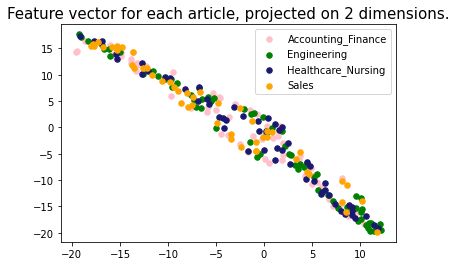

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def plotTSNE(labels,features): #using the library for present the values 
    categories = sorted(labels.unique())
    # Sampling a subset of our datset 
    SAMPLE_SIZE = int(len(features) * 0.3)
    np.random.seed(0)
    indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
    projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
    colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
    for i in range(0,len(categories)):
        points = projected_features[(labels[indices] == categories[i])]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=categories[i])
    plt.title("Feature vector for each article, projected on 2 dimensions.",
              fontdict=dict(fontsize=15))
    plt.legend()
    plt.show()
features = discriptionW2v_dvs.to_numpy()
plotTSNE(df['categary'],features)

Generating TF-IDF weighted document vectors


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfVector = TfidfVectorizer(analyzer = "word",vocabulary = vocab) # initialised the TfidfVectorizer on the basis of vocab 
features_of_tfidf = tfVector.fit_transform([' '.join(article) for article in tokenize_list])
#generate the tfidf vector representation for all discription
features_of_tfidf.shape
features_of_tfidf

<776x5169 sparse matrix of type '<class 'numpy.float64'>'
	with 62716 stored elements in Compressed Sparse Row format>

# Saving the tfidf model

In [32]:
def write_File_vector(data_features,filename):
    num = data_features.shape[0] # the number of document
    file_Name = open(filename, 'w') # creates a txt file and open to save the vector representation
    for a_ind in range(0, num): # loop through each article by index
        for f_ind in data_features[a_ind].nonzero()[1]: # for each word index that has non-zero entry in the data_feature
            value = data_features[a_ind][0,f_ind]  # retrieve the value of the entry from data_features
            file_Name.write("{}:{} ".format(f_ind,value)) # write the entry to the file in the format of word_index:value
        file_Name.write('\n')  # start a new line after each article
    file_Name.close()          # close the file     

In [33]:
file_of_tfidfVector = "./discription_tVector.txt"

In [34]:
write_File_vector(features_of_tfidf,file_of_tfidfVector) 

#  Generating TF-IDF weighted document vectors

In [35]:
dic_swap = {v: k for k, v in dic_of_vocab.items()}
dic_swap      #converting the vocab as required 

{0: 'aap',
 1: 'aaron',
 2: 'aat',
 3: 'abb',
 4: 'abenefit',
 5: 'aberdeen',
 6: 'abi',
 7: 'abilities',
 8: 'abreast',
 9: 'abroad',
 10: 'absence',
 11: 'absolute',
 12: 'ac',
 13: 'aca',
 14: 'academic',
 15: 'academy',
 16: 'acca',
 17: 'accept',
 18: 'acceptable',
 19: 'acceptance',
 20: 'accepted',
 21: 'access',
 22: 'accessible',
 23: 'accident',
 24: 'accommodates',
 25: 'accommodation',
 26: 'accomplished',
 27: 'accordance',
 28: 'account',
 29: 'accountabilities',
 30: 'accountability',
 31: 'accountable',
 32: 'accountancy',
 33: 'accountant',
 34: 'accountants',
 35: 'accounting',
 36: 'accounts',
 37: 'accreditation',
 38: 'accredited',
 39: 'accruals',
 40: 'accuracy',
 41: 'accurate',
 42: 'accurately',
 43: 'achievable',
 44: 'achieve',
 45: 'achieved',
 46: 'achievement',
 47: 'achievements',
 48: 'achiever',
 49: 'achieving',
 50: 'acii',
 51: 'acquired',
 52: 'acquisition',
 53: 'acquisitions',
 54: 'act',
 55: 'acting',
 56: 'action',
 57: 'actions',
 58: 'action

In [36]:
def doc_wordweights(fName_tVectors, voc_dict):
    tfidf_weights = [] # a list to store the  word:weight dictionaries of documents
    
    with open(fName_tVectors) as tVecf: 
        tVectors = tVecf.read().splitlines() # each line is a tfidf vector representation of a document in string format 'word_index:weight word_index:weight .......'
    for tv in tVectors: # for each tfidf document vector
        tv = tv.strip()
        weights = tv.split(' ') # list of 'word_index:weight' entries
        weights = [w.split(':') for w in weights] # change the format of weight to a list of '[word_index,weight]' entries
        wordweight_dict = {dic_swap[int(w[0])]:w[1] for w in weights} # construct the weight dictionary, where each entry is 'word:weight'
        tfidf_weights.append(wordweight_dict) 
    return tfidf_weights

fName_tVectors = 'discription_tVector.txt'
tfidf_weights = doc_wordweights(fName_tVectors, dic_swap)

In [37]:
def gen_docVecs(wv,tk_txts,tfidf = []): # generate vector discription
    docs_vectors = pd.DataFrame() # creating a empty  dataframe
 
    for i in range(0,len(tk_txts)):
        tokens = list(set(tk_txts[i])) # getting the list of different words of the discription

        temp = pd.DataFrame()  # creating a fake dataframe
        for w_ind in range(0, len(tokens)): # loop through each article by index
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # embeddings is  proceed when word in the discription
                
                if tfidf != []:
                    word_weight = float(tfidf[i][word])
                else:
                    word_weight = 1
                temp = temp.append(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to fake dataframe
            except:
                pass
        doc_vector = temp.sum() 
        docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each discription value to the dataframe
    return docs_vectors

In [38]:
weighted_bbcW2v_dvs = gen_docVecs(discription_w2v_wv,df['tk_text'],tfidf_weights)
weighted_bbcW2v_dvs    #weighted_model 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.869983,0.370313,0.486729,-0.063872,0.172184,-2.361203,0.931990,3.046058,-1.007273,-0.075575,...,2.031685,0.943891,0.152020,0.950871,2.766253,1.445201,1.058764,-1.747739,0.562637,-0.925571
1,-0.451372,0.186333,0.259124,-0.028369,0.077994,-1.266746,0.510337,1.622766,-0.544088,-0.048748,...,1.100736,0.510236,0.098893,0.522829,1.493109,0.763078,0.577651,-0.939743,0.301384,-0.511392
2,-1.156253,0.640256,0.432365,-0.133199,0.144740,-2.999066,1.193556,3.895997,-1.139934,-0.357088,...,2.173860,1.123090,0.241310,0.990034,3.529991,1.879491,1.435318,-2.200094,0.942039,-1.208170
3,-0.589162,0.273352,0.297210,-0.069161,0.095151,-1.616941,0.680218,2.102727,-0.648386,-0.118058,...,1.326134,0.647715,0.117605,0.629200,1.909231,0.997064,0.773504,-1.193039,0.414348,-0.640976
4,-0.907788,0.424131,0.369973,-0.268749,0.190602,-2.659017,0.983044,3.611885,-0.870094,-0.369658,...,2.057485,0.980140,0.311401,1.068498,3.136565,1.758111,1.291038,-1.996887,0.694951,-0.959938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,-0.932060,0.700574,0.149947,-0.317979,0.106921,-2.531374,1.224954,3.557546,-0.554896,-0.803009,...,1.347588,0.808208,0.288962,0.718644,3.155263,1.775862,1.658632,-1.862341,1.113716,-1.147017
772,-1.251818,0.452079,0.791191,-0.042719,0.198555,-3.430759,1.373971,4.339396,-1.571877,-0.000159,...,3.070304,1.431696,0.214492,1.428236,3.969795,2.025974,1.480097,-2.532839,0.715751,-1.370863
773,-1.069941,0.522570,0.536739,-0.123768,0.153850,-2.963280,1.209072,3.847189,-1.154752,-0.253757,...,2.375420,1.153408,0.237471,1.125027,3.467931,1.821339,1.442377,-2.201952,0.815569,-1.187571
774,-0.875296,0.477125,0.417592,-0.160657,0.118855,-2.524168,1.035214,3.272159,-0.886644,-0.282993,...,1.943869,0.946380,0.235090,0.904691,2.964164,1.577898,1.284391,-1.873768,0.687378,-0.968491


In [39]:
tfidf_weights[1] 

{'west': '0.07004554021512886',
 'voucher': '0.10793511093553548',
 'trade': '0.08876465439255007',
 'statements': '0.09106858224838446',
 'senior': '0.05160348675382899',
 'securities': '0.12069414734030162',
 'reviews': '0.07495348028387888',
 'review': '0.06585988476413975',
 'responsible': '0.04616475923051621',
 'report': '0.07255954051984205',
 'related': '0.06818462370025495',
 'recruiting': '0.060958583973567265',
 'reconciliation': '0.09106858224838446',
 'products': '0.0531008483593736',
 'pricing': '0.08577310368574256',
 'preparation': '0.07444913644620071',
 'paying': '0.08988059596812745',
 'part': '0.04616475923051621',
 'outstanding': '0.07255954051984205',
 'number': '0.12338020008286914',
 'nav': '0.23079733755531948',
 'london': '0.054061452316495034',
 'journal': '0.11539866877765974',
 'involves': '0.08771251668864503',
 'input': '0.08320044991064544',
 'hedge': '0.24138829468060324',
 'head': '0.07004554021512886',
 'funds': '0.22258235299054976',
 'fund': '0.7184

### Saving outputs
Save the count vector representation as per spectification.
- count_vectors.txt

In [40]:
with open(r'count_vectors.txt','w') as file:
        for item in count_vector:
# write each item on a new Line
                file.write("%s \n" % item)        
        print ('File is saved ')


'File is saved '


## Task 3. Job Advertisement Classification

In [45]:
from gensim.corpora import Dictionary
from gensim.models.tfidfmodel import TfidfModel  
from sklearn.linear_model import LogisticRegression

In [46]:
labels = df['categary']      # using the labels for each discription 

# Model for count features 

In [47]:
from sklearn.model_selection import train_test_split    # importing the library 

# creating training and test split for model 
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_features, labels, list(range(0,len(labels))),test_size=0.33, random_state=seed)


In [48]:
seed = 0
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(count_features, labels, test_size=0.33, random_state=seed)
model = LogisticRegression(random_state=seed)      #using logisticRegression for classification 
model.fit(X_train, y_train)  
model.score(X_test, y_test)  # checking the accuracy of the model 

0.8832684824902723

# Model for tfidf features 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features_of_tfidf, labels, test_size=0.33, random_state=seed)
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8949416342412452

In [51]:
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True) # initialise a 5 fold validation
print(kf)

KFold(n_splits=5, random_state=0, shuffle=True)


In [52]:
def evaluate(X_train,X_test,y_train, y_test,seed):
    model = LogisticRegression(random_state=seed)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

## Creating a function that is use for saving the accuracy of models 

In [55]:
num_models = 3
models_df = pd.DataFrame(columns = ['count','tfidf'],index=range(num_folds))
              # creates a dataframe for accuracy of every model 

fold = 0
for train_index, test_index in kf.split(list(range(0,len(labels)))):
    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    X_train_count, X_test_count = count_features[train_index], count_features[test_index]
    models_df.loc[fold,'count'] = evaluate(count_features[train_index],count_features[test_index],y_train,y_test,seed)

    X_train_tfidf, X_test_tfidf = features_of_tfidf[train_index], features_of_tfidf[test_index]
    models_df.loc[fold,'tfidf'] = evaluate(features_of_tfidf[train_index],features_of_tfidf[test_index],y_train,y_test,seed)
    
    fold +=1 

In [56]:
models_df

,count,tfidf
0,0.865385,0.878205
1,0.877419,0.929032
2,0.877419,0.896774
3,0.851613,0.877419
4,0.870968,0.896774
